In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import mplhep # Cambia el estilo al grafico
plt.style.use(mplhep.style.CMS) # Tipo de grafico al estilo CMS/CERN

In [2]:
L=3
N=L**2
nbr = { i : ( ( i // L ) * L + ( i + 1 ) % L, ( i + L ) % N,
            ( i // L ) * L + ( i - 1 ) % L, ( i - L ) % N ) for i in range(N)}
nbr

{0: (1, 3, 2, 6),
 1: (2, 4, 0, 7),
 2: (0, 5, 1, 8),
 3: (4, 6, 5, 0),
 4: (5, 7, 3, 1),
 5: (3, 8, 4, 2),
 6: (7, 0, 8, 3),
 7: (8, 1, 6, 4),
 8: (6, 2, 7, 5)}

In [3]:
def simulation(iter,spin_n):
    spin = np.zeros([iter,spin_n],dtype=int) #Arreglo de todos los posibles estados de los espines a llenar 
    arr_j = [] # arroja las posiciones en que se realiza el switch de estado en el espin

    for i in range(len(spin[0])):
        spin[0,i] = -1 # Condicion inicial, todos los espines hacia abajo


    for i in range(len(spin)-1):
        temp_j = np.random.randint(len(spin[0])) # Selecciona una posicion aleatoria en el arreglo inicial de espines
        arr_j.append(temp_j)
        for j in range(len(spin[0])): 
            if temp_j == j: # si la posicion de j coincide con la seleccionada aleatoriamente hace:
                spin[i+1,j] = spin[i,j]*(-1) # invierte la polaridad
            else:
                spin[i+1,j] = spin[i,j] # Si no coincide j con la seleccionada aleatoria, guarda la posicion del anterior estado del espin

    return spin # Devuelve el arreglo que contiene todos los estados posibles de los espines ya completo

def sim_energy(spin): # Funcion que encuentra la energia de cada microestado
    return [ 2*sum(i) for i in spin ]

def graph(energy,col1="g",col2="darkgreen",b=32,offs=0): # Funcion que grafica, requiere la energia y algunos valores para visualizar adecuadamente los histogramas y la funcion de ajuste
    xt = np.unique(energy) # x-ticks labels
    xtt = xt+offs # set x-ticks 
    mu = np.mean(energy)+offs # encuentra la media dado los datos de energia
    std = np.std(energy) # encuentra la desviacion estandar dado los datos de energia
    x = np.linspace(min(energy),max(energy),100) # numero de puntos en eje x para graficar la funcion de distribucion normal asociada a los datos de energia
    p = norm.pdf(x,mu,std) # funcion de distribucion normal asociada a los datos de energia

    plt.figure(figsize=(20,8)) # Tamaño de la figura
    plt.hist(energy,bins=b,alpha=0.6,density=True,color=col1,edgecolor=col1) # histograma de los datos de energia
    plt.xticks(ticks=xtt,labels=xt,fontsize=10) # ingresa las energias correspondientes a cada bin.
    plt.plot(x,p, color=col2, linewidth=4) # grafica la funcion de ajuste dada la distribucion normal
    plt.legend(["Fit","Data"]) # indica a que pertenece los datos.
    plt.show()

def digits(iter,spin,energy): # funcion que muestra la cantidad (iter) de datos que se genero de espin y energia en cada iteracion. 
    for i in range(iter):
        print("Spin states="+str(spin[i])+"\t Energy= "+str(energy[i])) # imprime los resultados
        

# Simulation steps=1e6, N=36

In [11]:
spin = simulation(1000000,36)
E = sim_energy(spin)

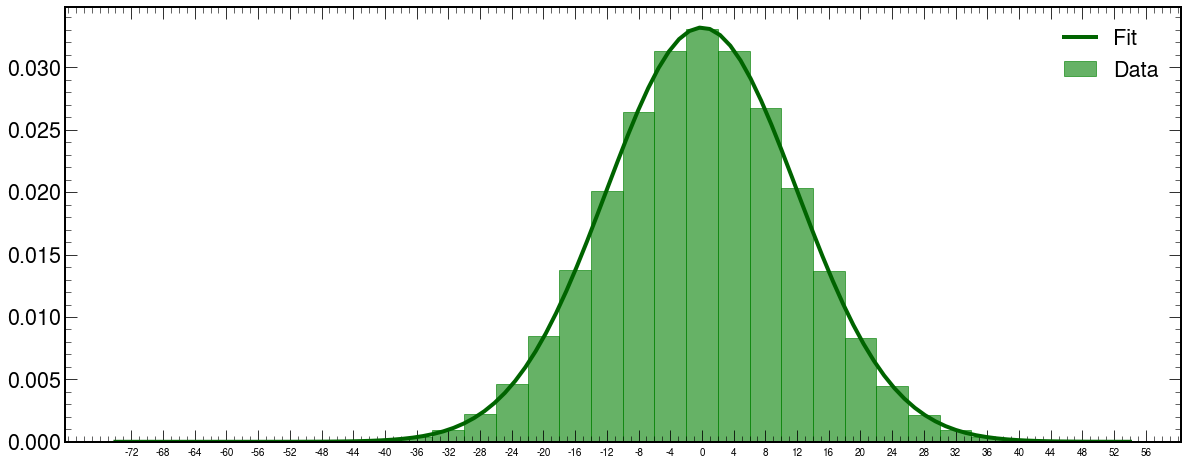

In [13]:
graph(E,"g","darkgreen",32,2)

### First 5 spin states and their energy

In [5]:
digits(5,spin,E)

Spin states=[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]	 Energy= -72
Spin states=[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1]	 Energy= -68
Spin states=[-1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1]	 Energy= -64
Spin states=[-1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1]	 Energy= -60
Spin states=[-1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1]	 Energy= -56


# Simulation steps=1e6, N=16

In [14]:
spin2 = simulation(1000000,16)
E2 = sim_energy(spin2)

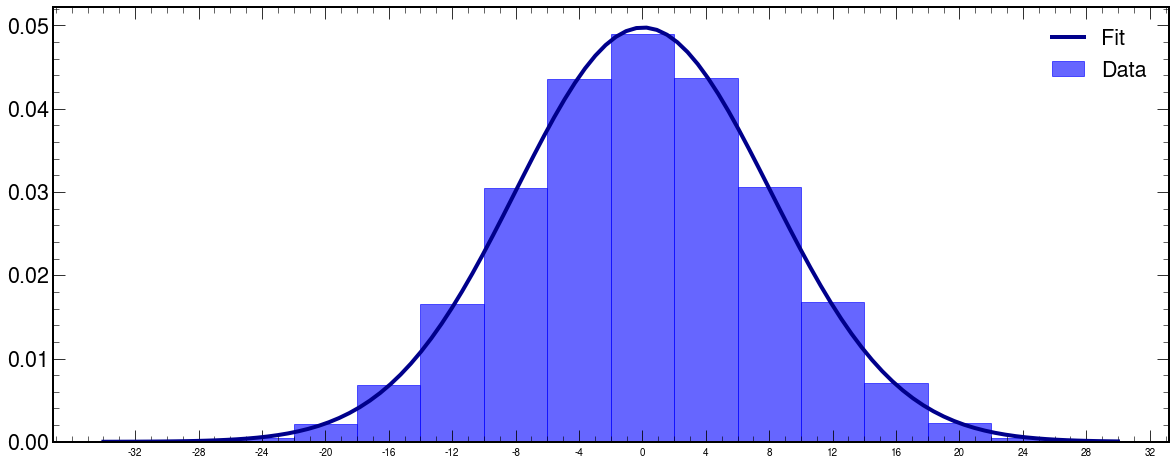

In [15]:
graph(E2,"b","darkblue",16,2)

### First 5 spin states and their energy

In [7]:
digits(5,spin2,E2)

Spin states=[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]	 Energy= -32
Spin states=[-1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1]	 Energy= -28
Spin states=[-1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1]	 Energy= -24
Spin states=[-1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1 -1 -1 -1]	 Energy= -20
Spin states=[-1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1]	 Energy= -24


# Simulation steps=1e6, N=4

In [16]:
spin3 = simulation(1000000,4)
E3 = sim_energy(spin3)

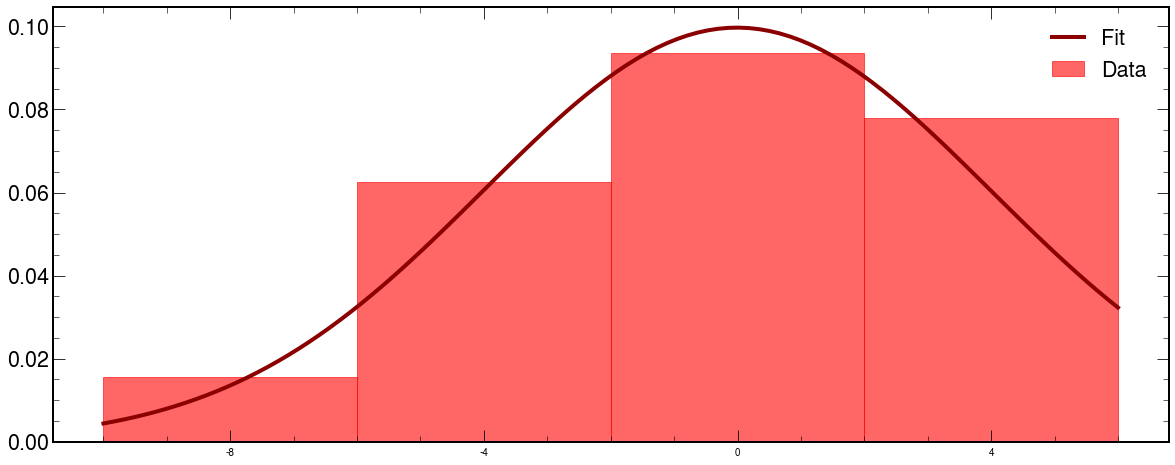

In [17]:
graph(E3,"r","darkred",4,2)

### First 5 spin states and their energy

In [9]:
digits(5,spin3,E3)

Spin states=[-1 -1 -1 -1]	 Energy= -8
Spin states=[-1 -1  1 -1]	 Energy= -4
Spin states=[ 1 -1  1 -1]	 Energy= 0
Spin states=[-1 -1  1 -1]	 Energy= -4
Spin states=[-1  1  1 -1]	 Energy= 0
